In [27]:
import tensorflow as tf

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [29]:
# Get the data
!wget https://raw.githubusercontent.com/lazyprogrammer/machine_learning_examples/master/tf2.0/moore.csv

--2023-07-21 14:38:10--  https://raw.githubusercontent.com/lazyprogrammer/machine_learning_examples/master/tf2.0/moore.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.109.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2302 (2.2K) [text/plain]
Saving to: ‘moore.csv.1’

moore.csv.1         100%[===================>]   2.25K  --.-KB/s    in 0s      

2023-07-21 14:38:10 (23.5 MB/s) - ‘moore.csv.1’ saved [2302/2302]



In [48]:
data = pd.read_csv('moore.csv',header=None).values
X = data[:,0].reshape(-1, 1) # make it a 2-D array of size N x D where D = 1
Y = data[:,1]

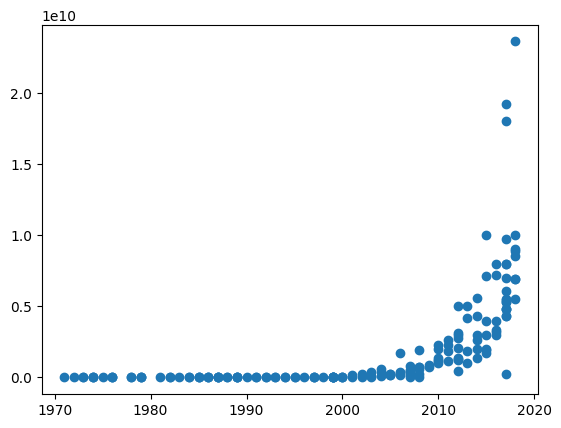

In [49]:
# Plot the data as scatter plot
plt.scatter(X,Y)

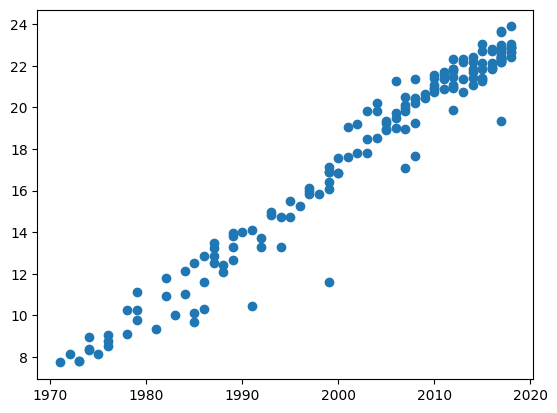

In [50]:
# Linear model take the logarithm
Y = np.log(Y)
plt.scatter(X,Y)

In [51]:
# Lets translate the values around the mean
X = X-X.mean()

In [52]:
# Create the Tensorflow model

model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(1,)),
    tf.keras.layers.Dense(1)
])

model.compile(optimizer=tf.keras.optimizers.SGD(0.001,0.9),loss='mse')
# model.compile(optimizer='adam',loss='mse')

# learning rate scheduler

def schedule(epoch,lr):
  if epoch >= 50:
    return 0.0001
  return 0.001

scheduler = tf.keras.callbacks.LearningRateScheduler(schedule)

# train the model
r = model.fit(X,Y, epochs=200,callbacks=[scheduler])

Epoch 1/200
6/6 [==============================] - 0s 3ms/step - loss: 434.5355 - lr: 0.0010
Epoch 2/200
6/6 [==============================] - 0s 2ms/step - loss: 329.9281 - lr: 0.0010
Epoch 3/200
6/6 [==============================] - 0s 3ms/step - loss: 289.6565 - lr: 0.0010
Epoch 4/200
6/6 [==============================] - 0s 2ms/step - loss: 252.4869 - lr: 0.0010
Epoch 5/200
6/6 [==============================] - 0s 3ms/step - loss: 237.4875 - lr: 0.0010
Epoch 6/200
6/6 [==============================] - 0s 3ms/step - loss: 219.2709 - lr: 0.0010
Epoch 7/200
6/6 [==============================] - 0s 2ms/step - loss: 119.9357 - lr: 0.0010
Epoch 8/200
6/6 [==============================] - 0s 3ms/step - loss: 106.7402 - lr: 0.0010
Epoch 9/200
6/6 [==============================] - 0s 3ms/step - loss: 62.6332 - lr: 0.0010
Epoch 10/200
6/6 [==============================] - 0s 4ms/step - loss: 37.8964 - lr: 0.0010
Epoch 11/200
6/6 [==============================] - 0s 4ms/step - loss:

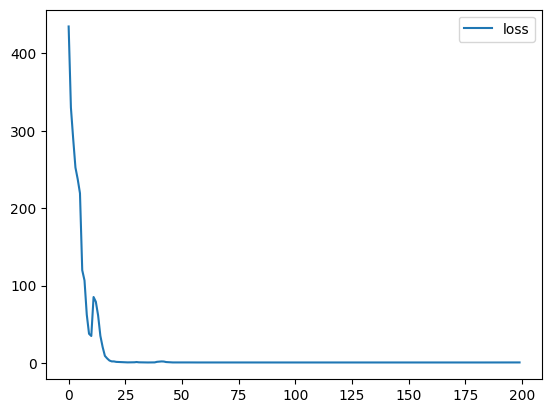

In [53]:
# plot loss
plt.plot(r.history['loss'],label='loss')
plt.legend()

In [54]:
model.layers

In [55]:
model.layers[0].get_weights()

[array([[0.34893936]], dtype=float32), array([17.779175], dtype=float32)]

In [56]:
a = model.layers[0].get_weights()[0][0,0]

In [57]:
a

0.34893936

In [58]:
print("Time to double:", np.log(2)/a)

Time to double: 1.9864402289634973


In [59]:
# Analytical
X = np.array(X).flatten()
Y = np.array(Y)
denominator = X.dot(X) - X.mean() * X.sum()
a = ( X.dot(Y) - Y.mean()*X.sum() ) / denominator
b = ( Y.mean() * X.dot(X) - X.mean() * X.dot(Y) ) / denominator
print(a, b)
print("Time to double:", np.log(2) / a)

0.341682487387313 17.764939393631764
Time to double: 2.0286295205239204


# 2: Make Predictions

6/6 [==============================] - 0s 5ms/step


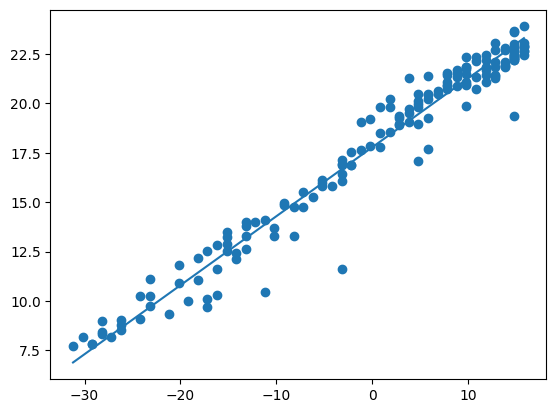

In [62]:
# Make sure the line fits our data
Yhat = model.predict(X).flatten()
plt.scatter(X, Y)
plt.plot(X, Yhat)

In [63]:
# Manual calculation

# Get the weights
w, b = model.layers[0].get_weights()

# Reshape X because we flattened it again earlier
X = X.reshape(-1, 1)

# (N x 1) x (1 x 1) + (1) --> (N x 1)
Yhat2 = (X.dot(w) + b).flatten()

# Don't use == for floating points
np.allclose(Yhat, Yhat2)

True